# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rcParams.update({'font.size': 15})

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [3]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


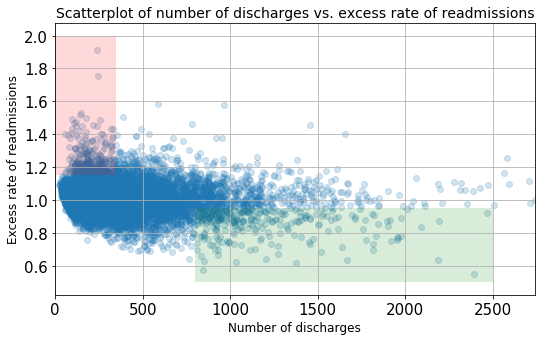

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()


## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

Let's start with commenting on the preliminary observations that are made.

### A. Initial observations based on the plot above
+ **Overall, rate of readmissions is trending down with increasing number of discharges**

*Given the above plot, its hard to see any sort of visual trend. It would have been helpuful to see a linear line fit to the data with a display of slope. Hence, we cannot conclude that the rate of readmissions is trending down with increasing number of discharges*

+ **With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)**
+ **With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)**

*Though it is tempting to infer the above statements from the plots, we need to think about why only those area's are shaded. Clearly, they is no explanation about why those two ranges are selected and moreover it seems that they are only shaded to support the argument. The reason behind is if we take a look at the red area only excess rate of readmissions above 1 is shaded however we can clearly see that the rate of readmissions are below 1 for the same range of number of discharges. Hence, we can infer that the shaded area would not help us infer anything as they misrepresent the data*

### B. Statistics
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

*We cannot come up with those statistical numbers by looking at the plot. So, we don't know if these numbers are true. However, one should rememeber that the above numbers only represent sample data and not used to draw conclusions on population.*

Let's explore if the statistics reported are correct.

In [6]:
## We will use the cleaned data that is used to generate the plot
df = clean_hospital_read_df.copy()

## Keeping only needed data and droping all the 'NaN'
df.dropna(subset=['Excess Readmission Ratio','Predicted Readmission Rate',
                  'Expected Readmission Rate','Number of Readmissions'], 
          inplace=True)


# Subsetting the data
df_100 = df[df['Number of Discharges'] < 100]
df_1000 = df[df['Number of Discharges'] > 1000]


print("Statistics of mean excess readmission rate and proportion of hospitals with excess of readmission greater than 1")
print('')
## Stats of number of hospitals less than 
print("Stats for hospitals with Discharges < 100 and excess readmission rate > 1")
print('---------------------------------------------------------------------------')
print("%s %.3f" % ('mean:  ', df_100['Excess Readmission Ratio'].mean())) 
print("%s %.2f%%" % ('perc:  ', (len(df[(df['Number of Discharges'] <100) & 
                    (df['Excess Readmission Ratio'] > 1)]['Excess Readmission Ratio'])) 
                                 / float(len(df_100))*100)) 
print('---------------------------------------------------------------------------')
print('')



print("Stats for hospitals with Discharges > 1000 and excess readmission rate > 1")
print('---------------------------------------------------------------------------')
print("%s %.3f" % ('mean:  ', df_1000['Excess Readmission Ratio'].mean())) 
print("%s %.2f%%" % ('perc:  ', (len(df[(df['Number of Discharges'] >1000) & 
                    (df['Excess Readmission Ratio'] > 1)]['Excess Readmission Ratio']))
                     / float(len(df_1000))*100))
print('---------------------------------------------------------------------------')

Statistics of mean excess readmission rate and proportion of hospitals with excess of readmission greater than 1

Stats for hospitals with Discharges < 100 and excess readmission rate > 1
---------------------------------------------------------------------------
mean:   1.023
perc:   63.22%
---------------------------------------------------------------------------

Stats for hospitals with Discharges > 1000 and excess readmission rate > 1
---------------------------------------------------------------------------
mean:   0.978
perc:   44.49%
---------------------------------------------------------------------------


*From the above stats, the reported stats are correct. However, it should be remembered that this may not gurantee how the populations would be. In order to draw any meanigful conclusions, one has to perform statistical method such as hypothesis testing and builidng confidence interval.*

For example,to statistically conclude the similar arguments we set,
+ null hypothesis: They is no significant difference in proportion of excess readmission rate greater than 1 for hospital with discharge less than 100 and greater than 1000. 
+ Alternate hypothesis: They is significant difference in proportion of excess readmission rate greater than 1 for hospital with discharge less than 100 and greater than 1000

In [7]:
import scipy.stats as st
import statsmodels.stats.api as sms

two_sample = st.ttest_ind(df_100['Excess Readmission Ratio'], 
                          df_1000['Excess Readmission Ratio'])
cm = sms.CompareMeans(sms.DescrStatsW(df_100['Excess Readmission Ratio']), 
                      sms.DescrStatsW(df_1000['Excess Readmission Ratio']))

print('The 99% confidence interval about the mean difference is ({:.3f}, {:.3f}).'.format(cm.tconfint_diff(alpha = 0.01, usevar='unequal')[0],
                                                                                          cm.tconfint_diff(alpha = 0.01, usevar='unequal')[1]))
print('The t-statistic is %.3f and the p-value is %.8f.' % two_sample)

The 99% confidence interval about the mean difference is (0.029, 0.059).
The t-statistic is 10.061 and the p-value is 0.00000000.


/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Given the 99% confidence interval, t-statistic, and p-value of the one-tailed two sample t-test, we can reject the null hypothesis that the mean excess readmission rate for samples with less than 100 discharges is equal to that for samples with greater than 1000 discharges. We are 99% confident that the true mean difference lies between 0.029% and 0.059%.

### C. Conclusions
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

*Their is no statistical evidence for the claims made above. One has to provide basis for such claims in terms of how he/she formulated testing process, what are null and alternate hypothesis, significance level used, assumptions that are tested for performing hypothesis testing. Also, after the appropriate test, p-value and test statistic need to be reported for validity.* 

### D. Regulatory policy recommendations
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

*Again, the above statements are not provided with statistical evidence. Hence, such statements atmost are unfounded. Examining only two variables in this case i.e., number of discharge and excess readmission rate would only help draw conclusions on them, drawing conclusions outside those variables is unfounded. Again, here one need to understand the difference between correlation and causation. The two variables can be correlated with highest pearson coefficient but that doesn't necessay mean causation. Finally, to draw the above statements we need to investigate other factors and look for causations.*

**Given the above reasons, it does not seem that there is enough of a practical difference in excess readmission ratios due to discharges to warrant changes in funding based on hospital size of discharge numbers**

### Visualizations

In [8]:
# Lets start with exploring the data
df = pd.read_csv('data/cms_hospital_readmissions.csv')
df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [9]:
## data types
print(df.dtypes)
df.describe()

Hospital Name                  object
Provider Number                 int64
State                          object
Measure Name                   object
Number of Discharges           object
Footnote                      float64
Excess Readmission Ratio      float64
Predicted Readmission Rate    float64
Expected Readmission Rate     float64
Number of Readmissions        float64
Start Date                     object
End Date                       object
dtype: object


,Provider Number,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,16860.000000,3129.000000,13731.000000,13731.000000,13731.000000,11497.000000
mean,263516.943654,2.905401,1.002582,16.916532,16.866135,63.633731
std,160146.191702,2.074384,0.091088,6.197542,5.989652,59.540296
min,10001.000000,1.000000,0.549500,2.700000,2.900000,11.000000
25%,110181.500000,1.000000,0.949500,15.200000,15.800000,24.000000
50%,250157.000000,1.000000,0.997100,18.500000,18.500000,45.000000
75%,390138.250000,5.000000,1.052350,21.100000,21.100000,82.000000
max,670091.000000,7.000000,1.909500,32.800000,29.400000,879.000000


we see that number of discharges is of type object where we expected float. so they might be some categorical variables in the column. Since we do not what the sort of string we have in our data, lets see unique string elements in the data

In [10]:
df['Number of Discharges'].str.get(0).unique()

array(['2', '5', '9', '1', '3', '7', '4', '6', '8', 'N', '0'], dtype=object)

We only have a sring that starts with 'N' and rest all are numbers from 0 to 9 coerced to obejct type. Lets explore 

In [11]:
print(len(df[df['Number of Discharges'].str.startswith('N')]))
df[df['Number of Discharges'].str.startswith('N')].head()

5282


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
62,DOCTORS HOSPITAL AT DEER CREEK LLC,190297,LA,READM-30-HIP-KNEE-HRRP,Not Available,NaN,1.3287,6.2,4.7,NaN,07/01/2010,06/30/2013
92,PARK RIDGE HEALTH,340023,NC,READM-30-HIP-KNEE-HRRP,Not Available,NaN,1.2941,5.7,4.4,NaN,07/01/2010,06/30/2013
94,MEADOWS REGIONAL MEDICAL CENTER,110128,GA,READM-30-HIP-KNEE-HRRP,Not Available,NaN,1.2915,6.1,4.7,NaN,07/01/2010,06/30/2013
103,WHEATON FRANCISCAN HEALTHCARE ST FRANCIS,520078,WI,READM-30-HIP-KNEE-HRRP,Not Available,NaN,1.2844,8.0,6.2,NaN,07/01/2010,06/30/2013
111,CARNEY HOSPITAL,220017,MA,READM-30-HIP-KNEE-HRRP,Not Available,NaN,1.2782,7.3,5.7,NaN,07/01/2010,06/30/2013


We see that, the number of discharges has 'Not Available' in the column.

In [12]:
print("Percentage of 'Not Available' entries in the Number of discharges ",
      len(df[df['Number of Discharges'].str.startswith('N')])*100/df.shape[0])

Percentage of 'Not Available' entries in the Number of discharges  31.32858837485172


We have approximately 32% of data that we cannot used to study number of discharges and excess readmission rate ratio as they is no data available. Lets drop the data and explore for NaN values in the data

In [13]:
## Dropping 'Not avaiable' entries in the data
df = df[df['Number of Discharges'].str.startswith('N') == False]
print(df.isnull().sum())
print(75*'-')
print("Percentage of Nan entries that are removed from data is: " ,df['Excess Readmission Ratio'].isnull().sum()*100/
                                                                     df.shape[0])

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio         81
Predicted Readmission Rate       81
Expected Readmission Rate        81
Number of Readmissions           81
Start Date                        0
End Date                          0
dtype: int64
---------------------------------------------------------------------------
Percentage of Nan entries that are removed from data is:  0.699602694766


In [14]:
## droping 'Nan'
df.dropna(subset=['Excess Readmission Ratio','Predicted Readmission Rate',
                  'Expected Readmission Rate','Number of Readmissions'], 
          inplace=True)

df['Number of Discharges'] = df['Number of Discharges'].astype(int)
df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio          0
Predicted Readmission Rate        0
Expected Readmission Rate         0
Number of Readmissions            0
Start Date                        0
End Date                          0
dtype: int64

In [15]:
## 
df.dtypes
df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11497.000000,11497.000000,0.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257571.540141,365.466209,NaN,1.007504,17.984292,17.865695,63.633731
std,154274.374018,308.754590,NaN,0.091964,5.487651,5.240749,59.540296
min,10001.000000,25.000000,NaN,0.549500,2.700000,3.900000,11.000000
25%,110129.000000,160.000000,NaN,0.952600,16.300000,16.600000,24.000000
50%,250042.000000,282.000000,NaN,1.003500,19.000000,19.000000,45.000000
75%,390039.000000,474.000000,NaN,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,NaN,1.909500,32.800000,28.000000,879.000000


### Based on the scatterplot above:
What are the advantages and disadvantages of using this plot to convey information?

Advantages:
1. Visually pleasing and easy to read for amount of information.
2. Provides green and red areas of focus.
 
Disadvantages:
1. Conveys too much information to draw simple conclusions.
2. Green and red areas of focus are not the same as the statistical analyses used and are misleading.
3. Seems to be taking odd slices of the data between [81:-3]
4. Shows the data in a misleading way for what trends are actually happening

In [20]:
bins = np.arange(0,7500,500)
df['binned_discharges'] = np.digitize(df['Number of Discharges'],bins = bins)

np.unique(df['binned_discharges'])

array([ 1,  2,  3,  4,  5,  6,  8, 14])

In [17]:
rename_bins = {'binned_discharges':
              {1 : "0-499", 1 : "500-999",2: "1000-1499", 3: "1500-1999", 4: "2000-2499", 5: "2500-2999",
               6: "3000-3499",7: "3500-3999",8: "4000-4499",9: "5000-5499", 10: "5500:5999", 11: "6000-6499",
               12: "6500-6999",13: "7000-7499", 14: "7500-8000"
              }
              }

In [21]:
df.replace(rename_bins,inplace = True)
import seaborn as sns
np.unique(df['binned_discharges'])

array(['1000-1499', '1500-1999', '2000-2499', '2500-2999', '3000-3499',
       '4000-4499', '500-999', '7500-8000'], dtype=object)

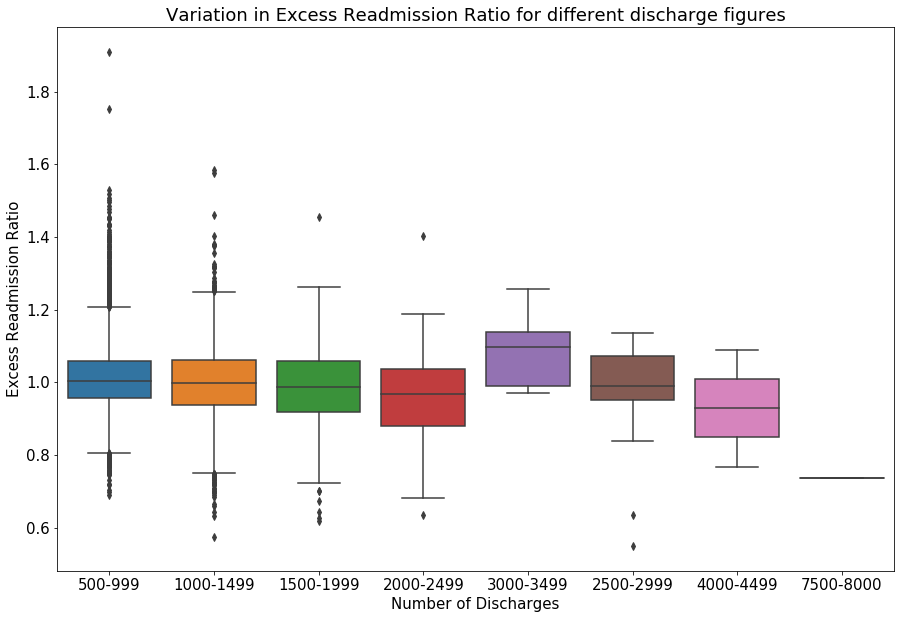

In [19]:
ax = sns.boxplot(x = "binned_discharges", y = "Excess Readmission Ratio",data = df)
fig = plt.gcf()
fig.set_size_inches(15,10)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
plt.xlabel("Number of Discharges")
plt.ylabel("Excess Readmission Ratio")
plt.title('Variation in Excess Readmission Ratio for different discharge figures')
plt.show()